#### pandas 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 프래프를 그림
- 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='',y='',kind='scatter'), 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram : plt.hist(x, bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,y,color='')
- scatter plot : plt.scatter(x,y)

#### seaborn
- sns.distplot(data, bins=, color=, kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.jointplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

https://seaborn.pydata.org/api.html

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [41]:
li = ['Date','Close','Start','High','Low','Volumn']
df.drop('전일종가',axis =1, inplace = True)
df.columns = li
df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volumn  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
# Q. Date를 datetime 으로 변경한 후 인덱스로 셋팅하세요.

In [5]:
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop(['Volumn'], axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Date'>

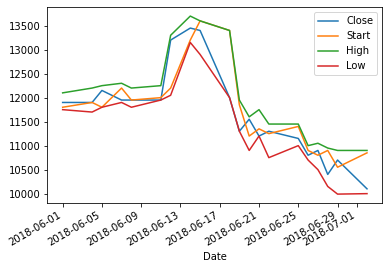

In [6]:
# 선그래프
df1.plot()

<AxesSubplot:xlabel='Date'>

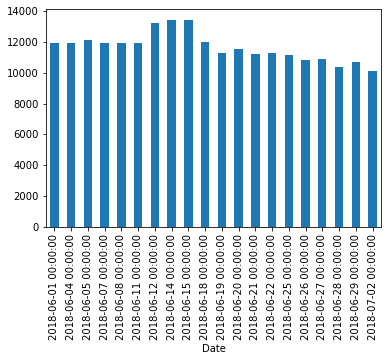

In [7]:
df2 = df1.sort_index()
df2.Close.plot(kind='bar')

In [8]:
# Q. 6월 데이터만을  추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요.

<AxesSubplot:xlabel='Date'>

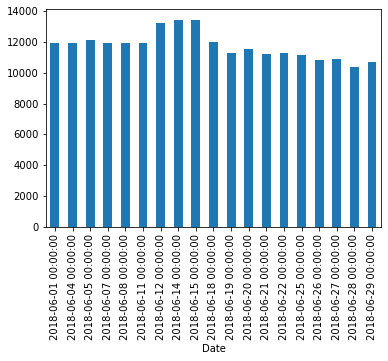

In [9]:
# df2.loc[df2.index<'2018-07-01'].Close.plot(kind='bar')
df2.loc['2018-06'].Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

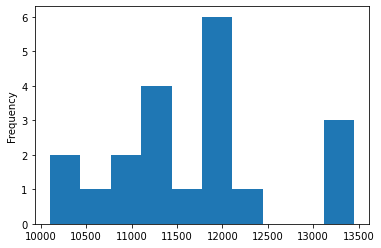

In [10]:
df2.Close.plot(kind='hist')

In [11]:
df.rename(columns = {'Volumn':'Volume'},inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:ylabel='Frequency'>

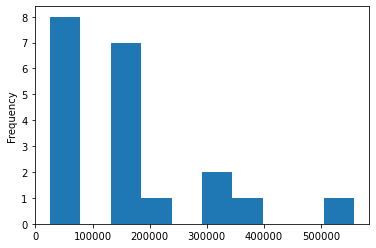

In [12]:
df.Volume.plot(kind='hist')

In [13]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

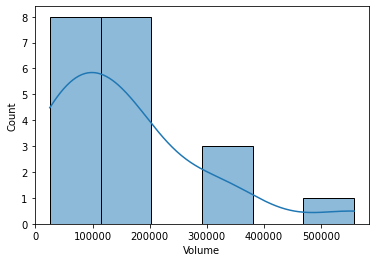

In [14]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

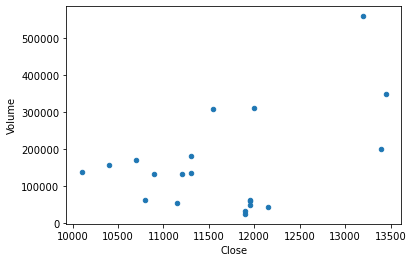

In [15]:
# 산점도
df.plot(x='Close',y='Volume',kind='scatter')

<AxesSubplot:>

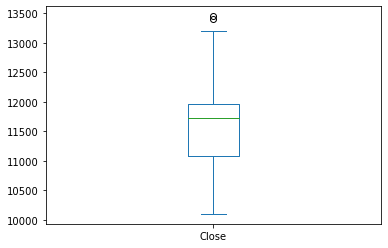

In [16]:
# Box Plot
df.Close.plot(kind='box')

#### Box plot 의미 해석
- IQR(Inter Quartile Range) : 제3사분위수(Q3) - 제1사분위수(Q1)
- lower whisker: Q1 - 1.5 * IQR 이내인 값중에서 최솟값
- upper whisker: Q3 + 1.5 * IQR 이내인 값중에서 최댓값
- 이상치 : lower whisker, upper whisker를 벗어나는 값

In [17]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [18]:
# Q. Close 칼럼의 이상치를 구하세요.

In [19]:
Q1 = df.Close.quantile(.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
uw_check = Q3 + 1.5 * IQR
print(uw_check,'\n')
print(df.Close.sort_values(ascending=False)[:5],'\n')
print('uw 13200을 벗어나는 값 선택:')
df.Close.loc[df.Close > Q3 + 1.5 * IQR]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 

uw 13200을 벗어나는 값 선택:


11    13400
12    13450
Name: Close, dtype: int64

In [20]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

[과제] df_ep 데이터 프레임으로 다음을 수행하세요
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

<AxesSubplot:xlabel='year'>

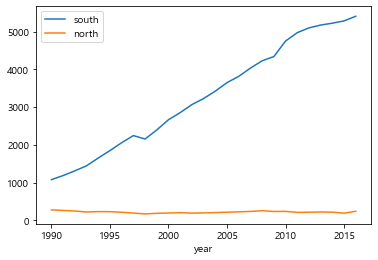

In [56]:
# df_ep 엑셀파일을 데이터프레임으로 불러오기
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.set_index('year',inplace=True)
df_ep

# 선 그래프
df_ep.plot()

<AxesSubplot:xlabel='year'>

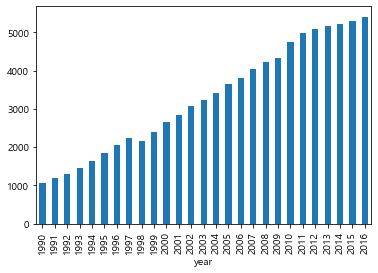

In [57]:
# 'south' 칼럼의 막대그래프
df_ep.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

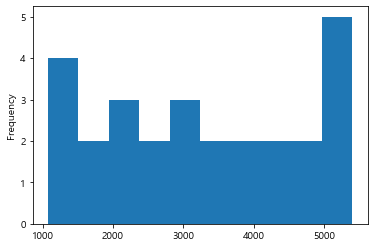

In [58]:
# 'south' 칼럼의 히스토그램
df_ep.south.plot(kind='hist')

<AxesSubplot:>

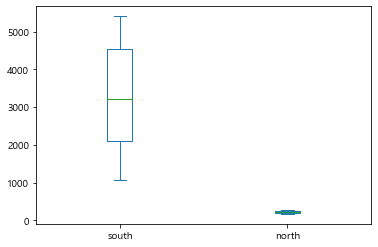

In [59]:
# box plot
df_ep.plot(kind='box')


In [21]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요(5개 이상)

<AxesSubplot:>

13437.5 

11    13600
10    13400
12    13200
16    12200
13    12200
Name: Start, dtype: int64 

uw 13400을 벗어나는값 선택


11    13600
Name: Start, dtype: int64

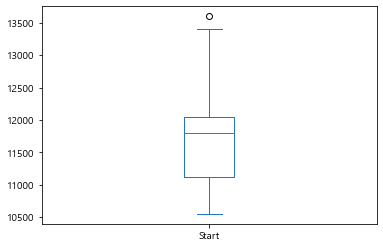

In [42]:
display(df.Start.plot(kind='box'))
Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3 - Q1
uw_check= Q3 + 1.5 * IQR
print(uw_check,'\n')
print(df.Start.sort_values(ascending=False)[:5],'\n')
print('uw 13400을 벗어나는값 선택')
df.Start.loc[df.Start > Q3 + 1.5 * IQR]


(array([1., 0., 3., 1., 1., 2., 1., 1., 2., 0., 4., 1., 3., 4., 1., 2., 3.,
        0., 3., 1., 3., 0., 2., 3., 2., 1., 1., 1., 2., 1.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ,
        21.8, 23.6, 25.4, 27.2, 29. , 30.8, 32.6, 34.4, 36.2, 38. , 39.8,
        41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. ]),
 <BarContainer object of 30 artists>)

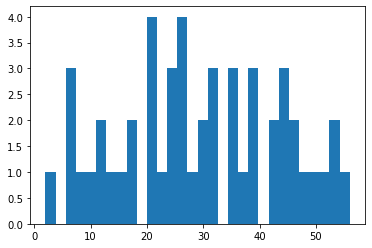

In [22]:
import matplotlib.pyplot as plt
np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,size=50)
plt.hist(data, bins=30)

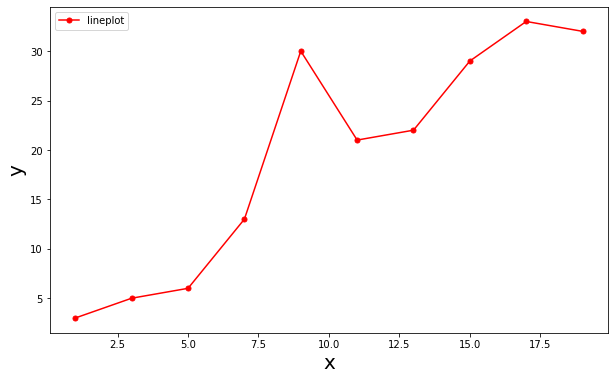

In [23]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize=(10,6))
plt.plot(x,y,color='red',marker='o', markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.legend(labels=['lineplot'])

Text(0.5, 1.0, 'Line Graph')

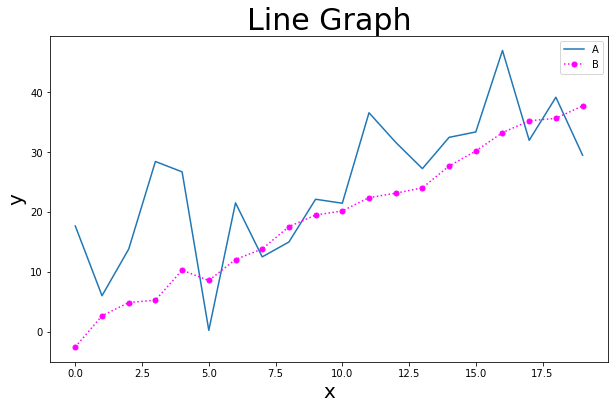

In [24]:
import numpy as np
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o', markersize=5, linestyle='dotted')
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.legend(labels=['A','B'])
plt.title('Line Graph',size=30)

Text(0.5, 0, 'X')

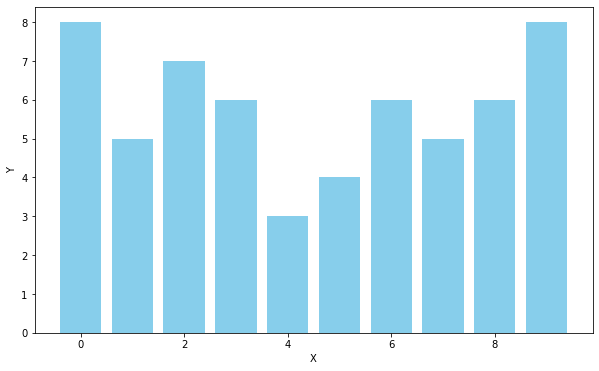

In [25]:
# 막대그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('Y')
plt.xlabel('X')

In [26]:
import pandas as pd
df = pd.read_csv('./dataset/movie.csv')
df.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


In [27]:
# Q. movie.csv에서 x축 movieNm, y축 salesAmt로 막대그래프를 그리세요.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

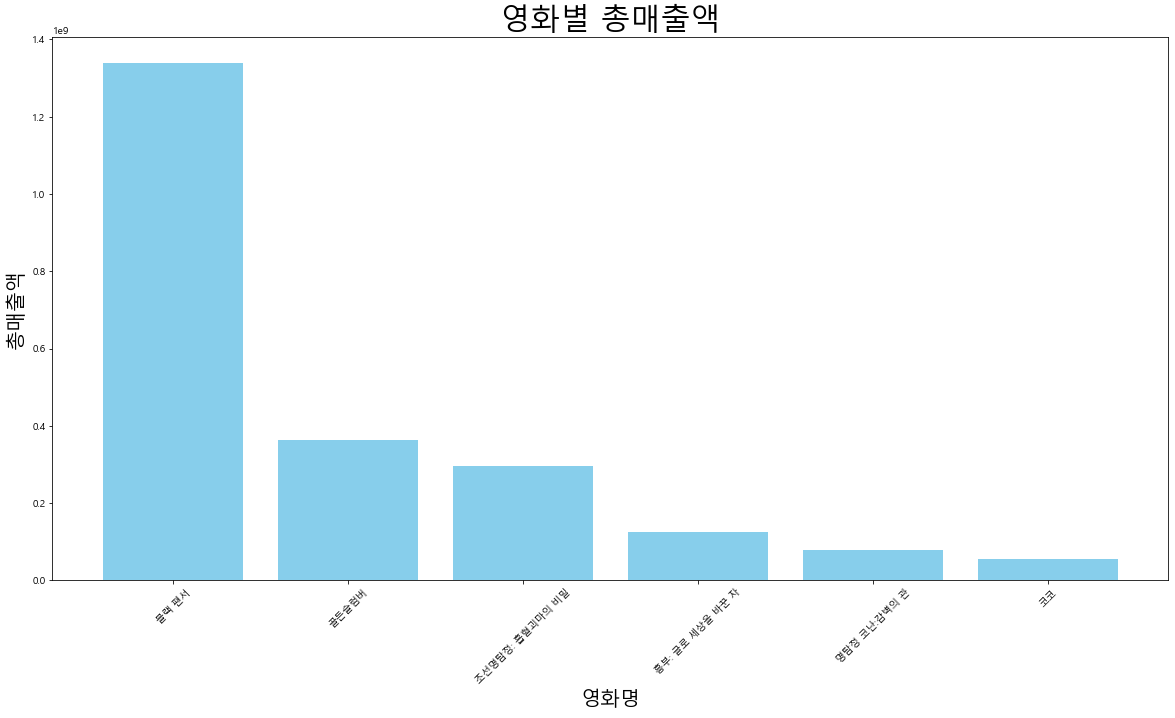

In [28]:
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리
plt.figure(figsize=(20,10))
plt.bar(df.movieNm,df.salesAmt,color='skyblue')
plt.title('영화별 총매출액',size=30)
plt.xlabel('영화명',size=20)
plt.ylabel('총매출액',size=20)
plt.xticks(rotation=45)

Text(0, 0.5, 'weight')

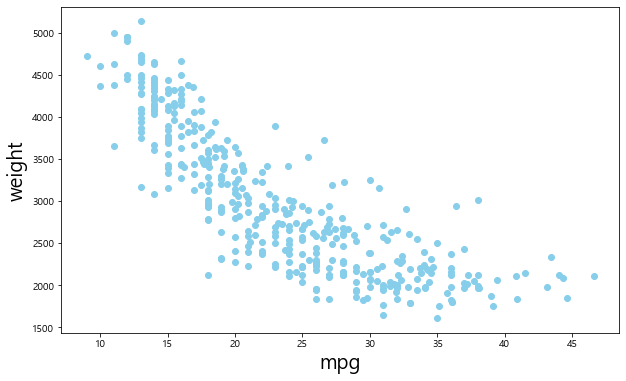

In [29]:
# scatter plot
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')
plt.xlabel('mpg',size=20)
plt.ylabel('weight',size=20)

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

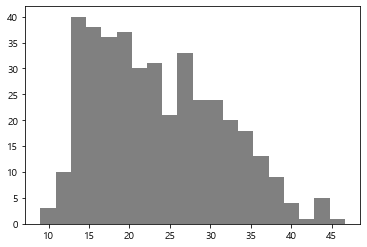

In [30]:
# histogram
plt.hist(x,bins=20,color='gray')

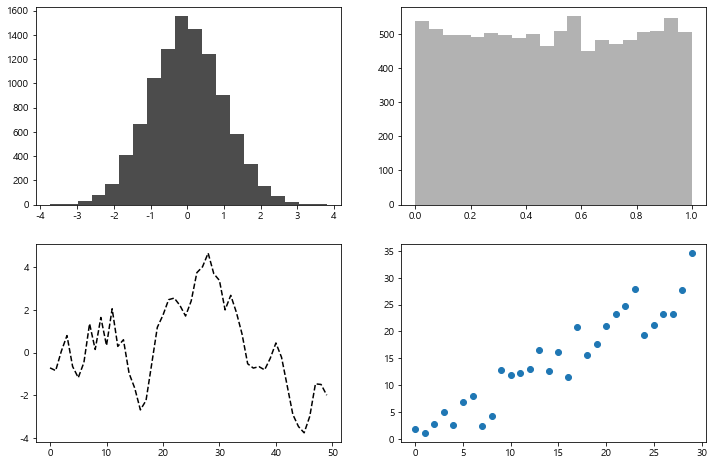

In [31]:
fig = plt.figure(figsize=(12,8))
# figure가 2 x 2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
np.random.seed(0)
ax1.hist(np.random.randn(10000), bins=20, color='k', alpha=0.7)
ax2.hist(np.random.rand(10000), bins=20, color='k',alpha=0.3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

In [32]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.

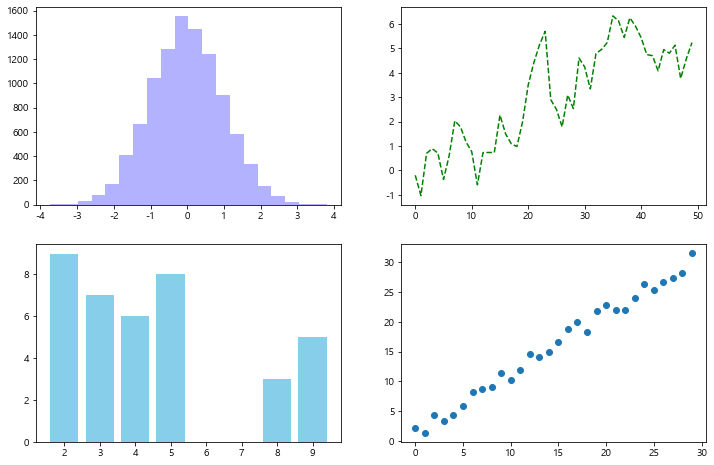

In [45]:
fig = plt.figure(figsize=(12,8))
# figure가 2x2 크기이고 4개의 서브플룻
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
np.random.seed(0)
ax1.hist(np.random.randn(10000), bins=20, color='blue',alpha=0.3)
ax2.plot(np.random.randn(50).cumsum(), 'g--')
# ax3.bar(np.random.randn(10),np.random.randn(10),width=0.8,color = 'skyblue' )
ax3.bar(np.random.randint(2,10,size=10),range(10),width=0.8,color = 'skyblue' )
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.rand(30))


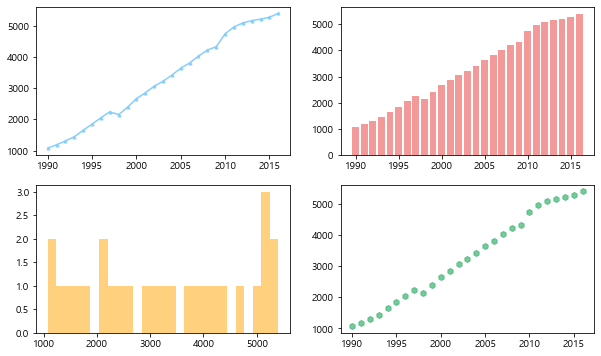

In [46]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.set_index('year',inplace=True)
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.xlabel
ax1.plot(df_ep.south,color='lightskyblue',marker='^',markersize=3)
ax2.bar(df_ep.index,df_ep.south,color='lightcoral',width=0.8,alpha=0.8)
ax3.hist(df_ep.south,bins=len(df_ep),color='orange',alpha=0.5)
ax4.scatter(df_ep.index,df_ep.south,color='mediumseagreen',alpha=0.7,marker='h')


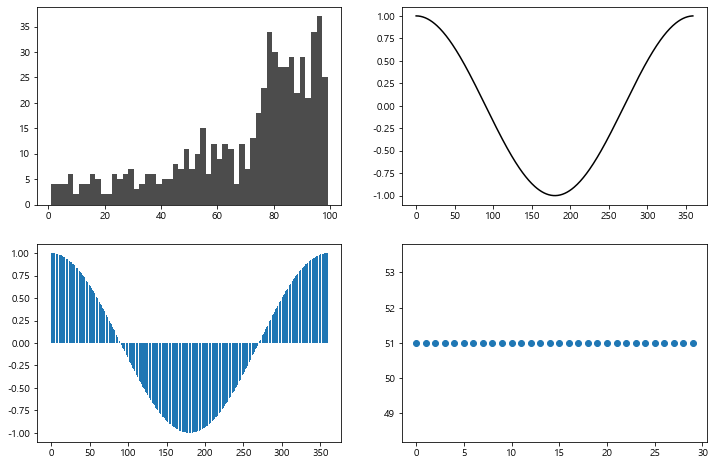

In [48]:
import math

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#=======================히스토그램=======================
num=np.zeros(600)
for i in range(100): num[i]=np.random.randint(1,45)
for i in range(100,250): num[i]=np.random.randint(45,75)
for i in range(250,600): num[i]=np.random.randint(75,100)    
ax1.hist(num, bins = 50, color ='k',alpha = 0.7) 
#=======================선=======================
x=np.arange(360)
y=[]
for i in x:
    a=math.cos(math.pi*(i/180))
    y.append(a)    
ax2.plot(x,y,  color = 'k')
#=======================막대=======================
ax3.bar(x,y,width=0.8)
#=======================산점도=======================
sc_x=np.arange(30)
sc_y=np.full(30,51)
ax4.scatter(sc_x,sc_y)


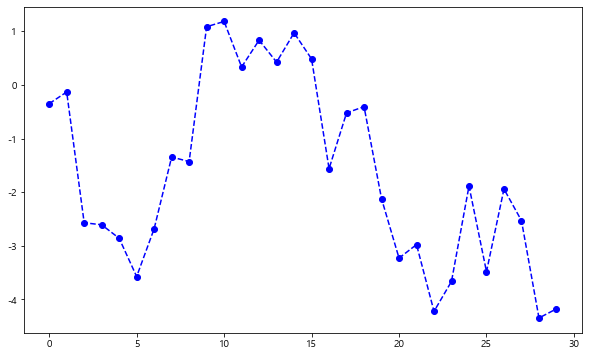

In [33]:
from numpy.random import randn
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed', color='b',marker='o')

In [34]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
# Q. t3에서 age열을 범주화한 후 age_cat 열을 추가하세요. 

In [36]:
def catage(age):
    cat = ''
    if age<10: cat='Child'
    elif age<20: cat='Teen'
    elif age<30: cat='20s'
    elif age<40: cat='30s'
    elif age<50: cat='40s'
    elif age<60: cat='50s'
    else: cat='Eldery'
    return cat
t3['age_cat'] = t3.age.apply(lambda x:catage(x))
t3[['age','age_cat']].head()

,age,age_cat
0,29.00,20s
1,0.92,Child
2,2.00,Child
3,30.00,30s
4,25.00,20s


         pclass  survived      age  sibsp  parch       fare    body  Ratio
age_cat                                                                   
20s         838       127  8402.00    112     77  9198.3038  5125.0    344
30s         488        98  7855.50     80     73  9578.5332  5020.0    232
40s         250        52  5958.50     50     68  5723.5168  3429.0    135
50s         101        32  3751.50     29     21  4384.9541  1889.0     70
Child       216        50   330.17    135    114  2403.4248     4.0     82


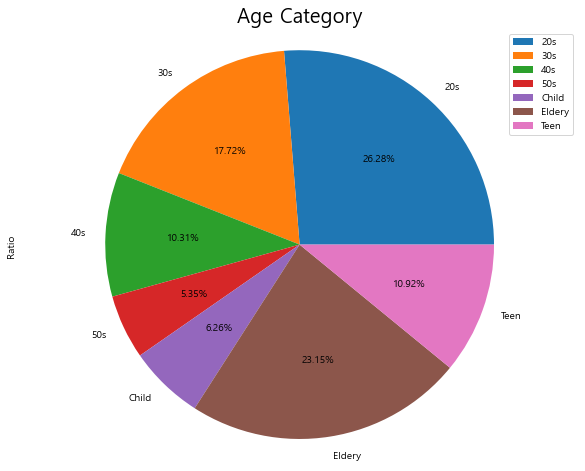

In [37]:
t3['Ratio'] = 1
df_age_cat = t3.groupby('age_cat').sum()
print(df_age_cat.head())

df_age_cat.Ratio.plot(kind='pie',
                     figsize=(10,8),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Age Category',size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index, loc='best')

<AxesSubplot:xlabel='length', ylabel='Count'>

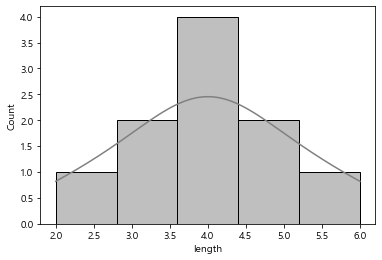

In [62]:
# 물고기 종류별 몸길이 데이터
import seaborn as sns

df = pd.read_csv('dataset/4_fm2.csv')
# 종류별 몸길이 데이터 추출
length_a = df.query('species=="A"')['length']
length_b = df.query('species=="B"')['length']
sns.histplot(length_a,color='gray',kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

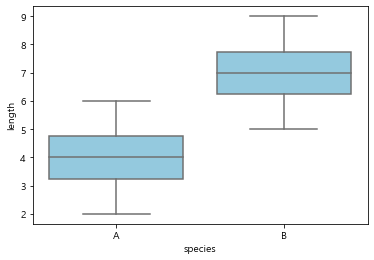

In [64]:
sns.boxplot(x='species',y='length',data=df,color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

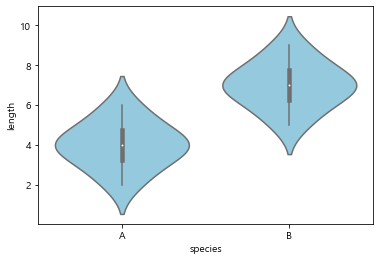

In [67]:
# 바이올린 플롯
sns.violinplot(x='species',y='length',data=df,color='skyblue')

In [68]:
df1 = df.copy()
df1.iloc[5,1] = 10
df1.iloc[10,1] =2

In [ ]:
# [과제] df1으로 박스플롯을 확인한 후 이상치를 구하세요.

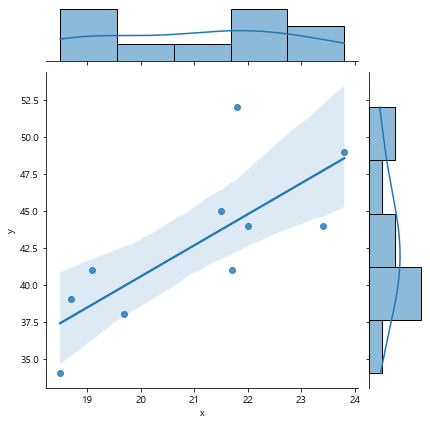

In [74]:
import warnings
warnings.filterwarnings('ignore')
cov_df = pd.read_csv('dataset/4_cov.csv')
# sns.jointplot(cov_df.x, cov_df.y)
sns.jointplot(cov_df.x, cov_df.y,kind='reg')

In [75]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


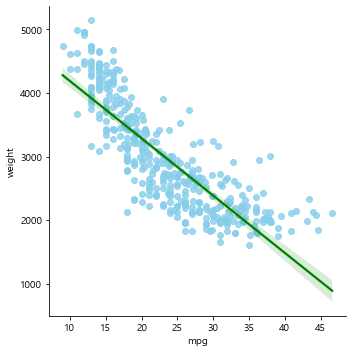

In [76]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'}, line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

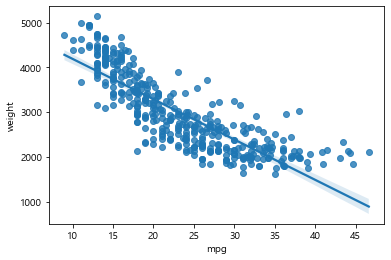

In [77]:
sns.regplot(x='mpg',y='weight',data=df_auto,fit_reg=True)

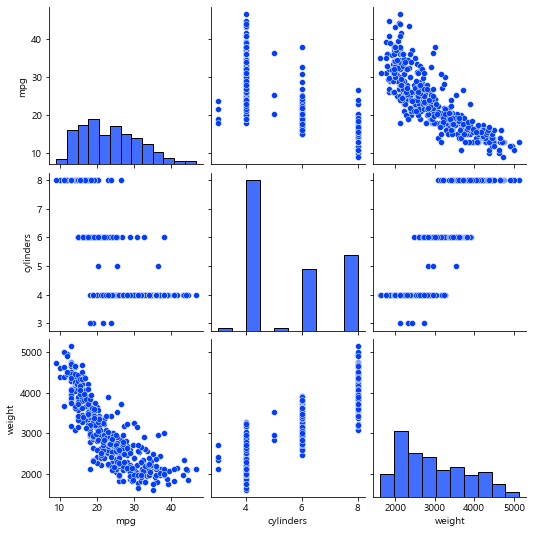

In [87]:
sns.set_palette("bright")
df2 = df_auto[['mpg','cylinders','weight']]
sns.pairplot(df2)

Text(0.5, 1.0, 'Heatmap of the Dataset')

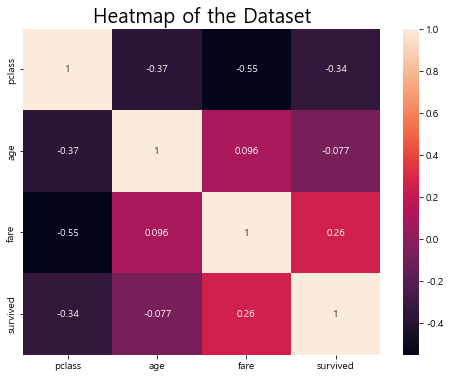

In [92]:
import matplotlib.pyplot as plt
tdf = sns.load_dataset('titanic')
plt.figure(figsize=(8,6))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset', fontsize=20)

In [93]:
table = tdf.pivot_table(index=['sex'], columns=['class'], values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

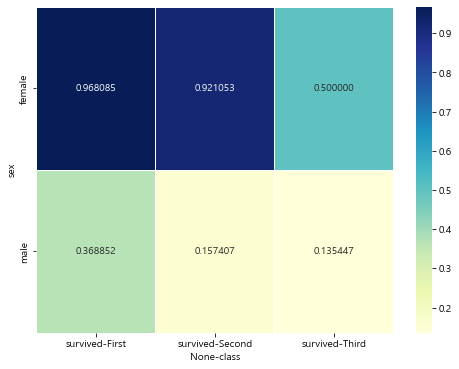

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(table,
           annot=True,fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)